In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from wordcloud import WordCloud
import base64
import string
import re
from collections import Counter
from time import time
# from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords
from nltk.corpus import stopwords
from sklearn.metrics import log_loss


#Csv 파일을 읽어들인다.

train = pd.read_csv(r'./Romance set/Romance.csv', skiprows=1, names=['Text', 'sentiment'])
test = pd.read_csv(r'./Romance set/Romance_test.csv',skiprows=0, names=['Text', 'sentiment'])

test.head()

,Text,sentiment
0,is a cinematic marvel its nostalgia meticulous...,happy
1,do i like musicals not really but damn is a no...,happy
2,the main characters in this los angeles romant...,happy
3,writerdirector damien chazelle who already had...,happy
4,the last time i felt like this in a cinema i w...,happy


In [3]:
#파일을 읽어들여서 정보를 표시한다.

display(train.head())
display(test.head())


print('Training Dataset Info:')
display(train.info())
print('Test Dataset Info:')
display(train.info())



,Text,sentiment
0,im not the kind of guy who likes a romance mov...,sad
1,this is another great production from korea ko...,sad
2,i always find myself wondering why during movi...,sad
3,a moment to remember is one of just a handful ...,sad
4,i stumbled upon this movie a few weeks ago and...,sad


,Text,sentiment
0,is a cinematic marvel its nostalgia meticulous...,happy
1,do i like musicals not really but damn is a no...,happy
2,the main characters in this los angeles romant...,happy
3,writerdirector damien chazelle who already had...,happy
4,the last time i felt like this in a cinema i w...,happy


Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9584 entries, 0 to 9583
Data columns (total 2 columns):
Text         9584 non-null object
sentiment    9584 non-null object
dtypes: object(2)
memory usage: 149.8+ KB


None

Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9584 entries, 0 to 9583
Data columns (total 2 columns):
Text         9584 non-null object
sentiment    9584 non-null object
dtypes: object(2)
memory usage: 149.8+ KB


None

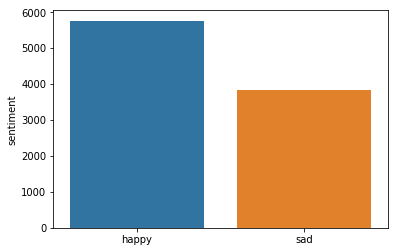

In [4]:
# Barplot of occurances of each author in the training dataset
sns.barplot(x=['happy', 'sad'], y=train['sentiment'].value_counts())
plt.show()

Number of words in all_text: 11843697


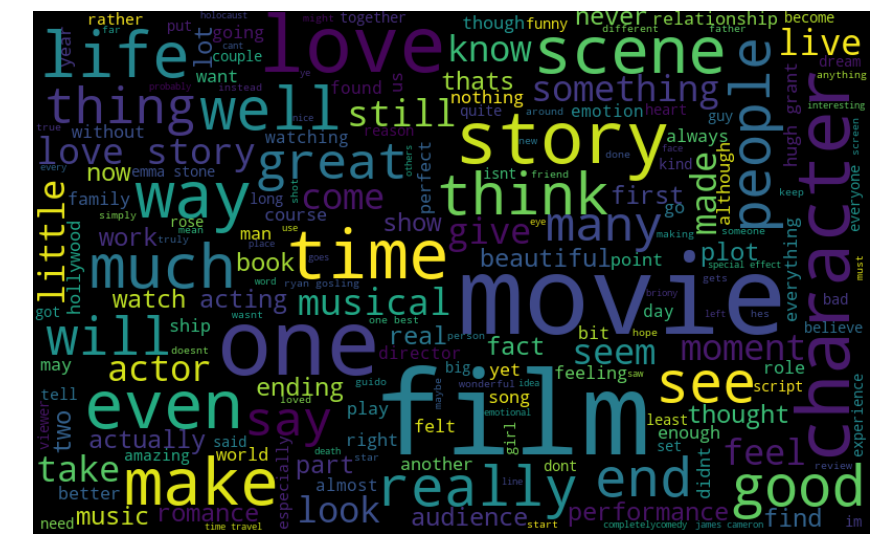

In [5]:
# Combine all training text into one large string
all_text = ' '.join([text for text in train['Text']])
print('Number of words in all_text:', len(all_text))

wordcloud = WordCloud(width=800, height=500,
                      random_state=21, max_font_size=110).generate(all_text)
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [6]:
from keras.preprocessing.text import Tokenizer
A, B = [], []


#트레인과 테스트 쓸모없는 값을 제거
for i in train['Text']:
    i = re.sub('[^a-zA-Z0-9 \n\.]', '', i)
    i = i.replace("br","").replace("  "," ").replace("   "," ")
    A.append(i)
    
for i in test['Text']:
    i = re.sub('[^a-zA-Z0-9 \n\.]', '', i)
    i = i.replace("br","").replace("  "," ").replace("   "," ")
    B.append(i)
    

train['Text'] = A
test['Text'] = B

print(train['Text'][30])
print(test['Text'][30])

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

a master piecemost romantic film ever made cried like a babyplus points screen play lead actors performances background music cinematography romantic scenesminus some drawback scenes in betweenthe main plot of the movie is a love story between a couplethe story starts with the flash back episode of cheolsu and sujin describing how they fall in love besides the previous affair of sujin and a bad childhood to cheolsuand the story continues with some good performances and scripti cant reveal the rest of the storywell i think no one should miss this movie must watch
in whiplash chazelles first feature excellent cinematography editing music and design combined with great acting and gripping scenes however it was marred by some serious disconnects with realism while purporting to be essentially realistic some of the character psychologies and story logic were stretched too thin ultimately one could enjoy the acting and the editshot rhythms and forgive the flawsthose same flaws from his first

/usr/local/lib/python3.5/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [8]:
from keras.preprocessing.text import Tokenizer

t = Tokenizer(nb_words=1000)
test_label = []
train_label = []
t.fit_on_texts(train['Text'])
t.fit_on_texts(test['Text'])


for i in train['sentiment']:
    if i == 'cruel':
        train_label.append(1)
    else:
        train_label.append(0)
        
for i in test['sentiment']:
    if i == 'cruel':
        test_label.append(1)
    else:
        test_label.append(0)
        
train_result = t.texts_to_sequences(train['Text'])
test_result = t.texts_to_sequences(test['Text'])
vocab_size = len(t.word_index)

print(train_result.__len__())
print(train_label.__len__())
print(test_label.__len__())
print(test_result.__len__())

print("train_result = ",train_result[:1])
print("text_result = ",test_result[:1])

print("train_label = ",train_label[:20])
print("test_label = ",test_label[:20])

# One-hot encoding the output into vector mode, each of length 1000
train_result = t.sequences_to_matrix(train_result, mode='binary')
test_result = t.sequences_to_matrix(test_result, mode='binary')
print(train_result[0])

9584
9584
1599
1599
train_result =  [[134, 20, 1, 263, 4, 368, 42, 3, 158, 12, 51, 485, 5, 25, 914, 55, 22, 89, 80, 3, 210, 90, 175, 11, 9, 1, 477, 66, 7, 185, 65, 70, 3, 352, 5, 407, 608, 784, 66, 45, 247, 16, 24, 193, 84, 915, 37, 2, 470, 158, 173, 1, 17, 6, 325, 48, 3, 177, 4, 782, 5, 8, 8, 135, 48, 3, 662, 829, 10, 6, 9, 160, 110, 1, 37, 221, 25, 425, 15, 24, 1, 490, 10, 6, 77, 229, 2, 675, 1, 7, 81, 220, 1, 103, 395, 9, 1, 12, 66, 13, 51, 77, 229, 264, 312, 1, 237, 113, 49, 24, 34, 5, 35, 193, 12, 173, 20, 200, 6, 222, 79, 55, 9, 43, 442, 12, 651, 9, 11, 477, 3]]
text_result =  [[6, 3, 833, 24, 2, 723, 43, 225, 2, 374, 1, 784, 4, 30, 4, 1, 73, 206, 4, 26, 131, 936, 4, 6, 611, 5, 200, 286, 11, 20, 80, 30, 4, 1, 73, 90, 9, 474, 15, 81, 30, 4, 1, 73, 394, 110, 2, 3, 51, 604, 833, 361, 1, 327, 6, 16, 168, 336, 201, 2, 986, 5, 1, 586, 880, 171, 148, 2, 143, 141, 85, 3, 261, 103, 16, 741, 275, 18, 50, 1, 594, 65, 99, 14, 96, 1, 106, 523, 31, 115, 352, 2, 1, 589, 6, 325, 102, 505, 1, 65,

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 32)          160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1000, 32)          3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 500, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 4,163,605
Trainable params: 4,163,605
Non-trainable para

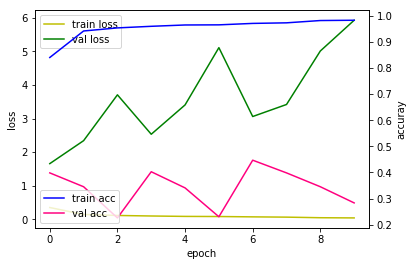

In [7]:
# CNN for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import plaidml.keras
plaidml.keras.install_backend()

# load the dataset but only keep the top n words, zero the rest
top_words = 5000
max_words = 1000

X_train = train_result
y_train = train_label
X_test = test_result
y_test = test_label # pad dataset to a maximum review length in words


import plaidml.keras
plaidml.keras.install_backend()
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
# Fit the model
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128, verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))



%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'g', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], '#FF007F', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [ ]:
# MLP for the IMDB problem

import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
max_words = 1000

# (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
X_train = train_result
y_train = train_label
X_test = test_result
y_test = test_label
print(X_train[0][:0])

# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


# Fit the model
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=128, verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))


%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'g', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], '#FF007F', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [9]:
# mnist(손글씨 숫자구분) 을 이용한 분석입니다. 참고용.


# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터셋 전처리
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

# 원핫인코딩 (one-hot encoding) 처리
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 훈련셋과 검증셋 분리
x_val = x_train[:42000] # 훈련셋의 30%를 검증셋으로 사용
x_train = x_train[42000:]
y_val = y_train[:42000] # 훈련셋의 30%를 검증셋으로 사용
y_train = y_train[42000:]

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))

# 5. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('')
print('loss_and_metrics : ' + str(loss_and_metrics))

# 6. 모델 사용하기
xhat_idx = np.random.choice(x_test.shape[0], 5)
xhat = x_test[xhat_idx]
yhat = model.predict_classes(xhat)

for i in range(5):
    print('True : ' + str(argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat[i]))

 2441216/11490434 [=====>........................] - ETA: 1:13

KeyboardInterrupt: 